<a href="https://colab.research.google.com/github/clbonmann/opencv/blob/main/Rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import pandas as pd
import matplotlib as mpl
import missingno as msno
import plotly.express as px
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

Loading CSV


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML Projects/OGMO/OGMO.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Horas_Chuva_1             4626 non-null   int64
 1   Horas_Chuva2_1            4626 non-null   int64
 2   Horas_Chuva2_2            4626 non-null   int64
 3   Horas_Chuva_2             4626 non-null   int64
 4   Horas_Chuva2_3            4626 non-null   int64
 5   Horas_Chuva_3             4626 non-null   int64
 6   Horas_Chuva_Fraca_1       4626 non-null   int64
 7   Horas_Chuva_Tempestade_1  4626 non-null   int64
 8   Horas_Chuva_Fraca_2       4626 non-null   int64
 9   Horas_Chuva_Tempestade_2  4626 non-null   int64
 10  Horas_Chuva_Fraca_3       4626 non-null   int64
 11  Horas_Chuva_Temporal_3    4626 non-null   int64
 12  Horas_Chuva_Tempestade_3  4626 non-null   int64
 13  TerEquipe                 4626 non-null   int64
dtypes: int64(14)
memory usage: 506.1 KB


In [ ]:
df['Precipitação_Real'] = round(df['Precipitação_Real'], 0).astype('int64')
df['PrecipitaçãoHora_1'] = round(df['PrecipitaçãoHora_1'], 0).astype('int64')
df['PrecipitaçãoHora_2'] = round(df['PrecipitaçãoHora_2'], 0).astype('int64')
df['PrecipitaçãoHora_3'] = round(df['PrecipitaçãoHora_3'], 0).astype('int64')

In [ ]:
df.head(5)

,Horas_Chuva_1,Horas_Chuva2_1,PrecipitaçãoHora_1,Horas_Chuva2_2,Horas_Chuva_2,PrecipitaçãoHora_2,Horas_Chuva2_3,Horas_Chuva_3,PrecipitaçãoHora_3,Horas_Chuva,...,Horas_Chuva_Moderada_2,Horas_Chuva_Forte_2,Horas_Chuva_Temporal_2,Horas_Chuva_Tempestade_2,Horas_Chuva_Fraca_3,Horas_Chuva_Moderada_3,Horas_Chuva_Forte_3,Horas_Chuva_Temporal_3,Horas_Chuva_Tempestade_3,TerEquipe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
print(df.corr())


                          Horas_Chuva_1  Horas_Chuva2_1  PrecipitaçãoHora_1  \
Horas_Chuva_1                  1.000000        0.882839            0.539212   
Horas_Chuva2_1                 0.882839        1.000000            0.648464   
PrecipitaçãoHora_1             0.539212        0.648464            1.000000   
Horas_Chuva2_2                 0.783080        0.826126            0.562132   
Horas_Chuva_2                  0.843453        0.774279            0.478503   
PrecipitaçãoHora_2             0.510490        0.595580            0.744190   
Horas_Chuva2_3                 0.720513        0.714755            0.515664   
Horas_Chuva_3                  0.768271        0.696689            0.446271   
PrecipitaçãoHora_3             0.482430        0.538858            0.629787   
Horas_Chuva                    0.430241        0.473534            0.433060   
Horas_Chuva_Fraca              0.396021        0.424494            0.376045   
Horas_Chuva_Moderada           0.264653        0.310

In [ ]:
X = df.drop(columns='TerEquipe')

# Calcular o skew de cada coluna
skew_values = X.skew().sort_values(ascending=False)
print(skew_values)

Horas_Chuva_Temporal_2      33.974245
Horas_Chuva_Temporal_1      30.433743
Horas_Chuva_Tempestade      21.445288
Horas_Chuva_Forte_2         15.401996
Horas_Chuva_Forte_3         15.168334
Horas_Chuva_Forte_1         15.114645
Horas_Chuva_Temporal         9.034301
Horas_Chuva_Forte            8.406444
Horas_Chuva_Moderada_2       8.195540
Horas_Chuva_Moderada_3       7.133819
Horas_Chuva_Moderada_1       6.942657
Precipitação_Real            5.403431
PrecipitaçãoHora_1           5.398073
Horas_Chuva_Moderada         5.181428
PrecipitaçãoHora_2           4.900251
PrecipitaçãoHora_3           4.372957
Horas_Chuva_Fraca            2.185819
Horas_Chuva                  2.042776
Horas_Chuva2_1               1.125063
Horas_Chuva2_2               1.087979
Horas_Chuva2_3               1.008265
Horas_Chuva_Fraca_1          0.559239
Horas_Chuva_Fraca_3          0.528792
Horas_Chuva_Fraca_2          0.522666
Horas_Chuva_1                0.512066
Horas_Chuva_3                0.487230
Horas_Chuva_

In [ ]:
high_skew_cols = skew_values[(skew_values > 1) | (skew_values < -1)].index.tolist()
print("Colunas com skew alto:", high_skew_cols)

Colunas com skew alto: ['Horas_Chuva_Temporal_2', 'Horas_Chuva_Temporal_1', 'Horas_Chuva_Tempestade', 'Horas_Chuva_Forte_2', 'Horas_Chuva_Forte_3', 'Horas_Chuva_Forte_1', 'Horas_Chuva_Temporal', 'Horas_Chuva_Forte', 'Horas_Chuva_Moderada_2', 'Horas_Chuva_Moderada_3', 'Horas_Chuva_Moderada_1', 'Precipitação_Real', 'PrecipitaçãoHora_1', 'Horas_Chuva_Moderada', 'PrecipitaçãoHora_2', 'PrecipitaçãoHora_3', 'Horas_Chuva_Fraca', 'Horas_Chuva', 'Horas_Chuva2_1', 'Horas_Chuva2_2', 'Horas_Chuva2_3']


In [ ]:
X_transformed = X.copy()
X_transformed[high_skew_cols] = X_transformed[high_skew_cols].apply(lambda x: np.log1p(x))

# Checar novo skew
new_skew = X_transformed[high_skew_cols].skew()
print("Skew após log-transformação:\n", new_skew)

Skew após log-transformação:
 Horas_Chuva_Temporal_2    33.974245
Horas_Chuva_Temporal_1    27.735577
Horas_Chuva_Tempestade    21.445288
Horas_Chuva_Forte_2       13.926707
Horas_Chuva_Forte_3       13.723303
Horas_Chuva_Forte_1       15.114645
Horas_Chuva_Temporal       8.790249
Horas_Chuva_Forte          7.575375
Horas_Chuva_Moderada_2     5.977251
Horas_Chuva_Moderada_3     5.590650
Horas_Chuva_Moderada_1     5.417879
Precipitação_Real          2.334002
PrecipitaçãoHora_1         1.674383
Horas_Chuva_Moderada       3.663014
PrecipitaçãoHora_2         1.602339
PrecipitaçãoHora_3         1.489140
Horas_Chuva_Fraca          1.447740
Horas_Chuva                1.366904
Horas_Chuva2_1             0.720665
Horas_Chuva2_2             0.731628
Horas_Chuva2_3             0.657219
dtype: float64


In [ ]:
df = df.drop(columns= ['Horas_Chuva_Temporal_2', 'Horas_Chuva_Temporal_1', 'Horas_Chuva_Tempestade', 'Horas_Chuva_Forte_2', 'Horas_Chuva_Forte_3', 'Horas_Chuva_Forte_1', 'Horas_Chuva_Temporal', 'Horas_Chuva_Forte', 'Horas_Chuva_Moderada_2', 'Horas_Chuva_Moderada_3', 'Horas_Chuva_Moderada_1', 'Precipitação_Real', 'PrecipitaçãoHora_1', 'Horas_Chuva_Moderada', 'PrecipitaçãoHora_2', 'PrecipitaçãoHora_3', 'Horas_Chuva_Fraca', 'Horas_Chuva'])

In [ ]:
from sklearn.model_selection import train_test_split
X = X_transformed  # features já transformadas (ou X original se não fez log)
y = df['TerEquipe']

# Dividir treino e teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Ajusta (fit) só no treino e transforma treino e teste
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Treina o pipeline
pipeline.fit(X_train, y_train)

# Faz previsões direto no pipeline
y_pred = pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = pipeline.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
print("Matriz de confusão:\n", cm)

Matriz de confusão:
 [[ 35   9]
 [  8 874]]


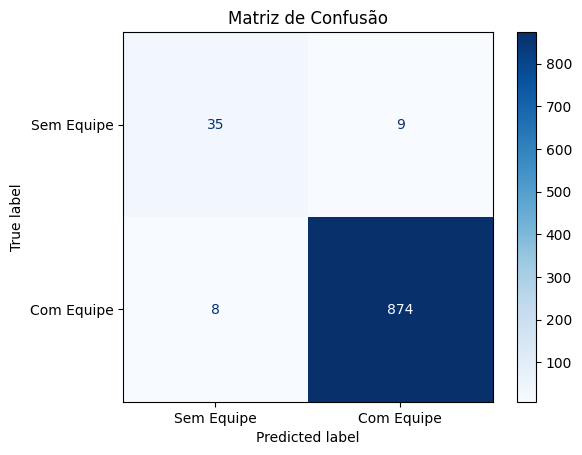

In [ ]:
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sem Equipe', 'Com Equipe'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Sem Equipe', 'Com Equipe']))

              precision    recall  f1-score   support

  Sem Equipe       0.81      0.80      0.80        44
  Com Equipe       0.99      0.99      0.99       882

    accuracy                           0.98       926
   macro avg       0.90      0.89      0.90       926
weighted avg       0.98      0.98      0.98       926



In [ ]:
# Obter as probabilidades previstas da classe positiva (Com Equipe)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Ajustar threshold para aumentar recall da classe 0 (Sem Equipe)
threshold = 0.4  # experimente valores como 0.4, 0.3, etc.
y_pred_thresh = (y_proba > threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Matriz de confusão com threshold ajustado:")
print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh, target_names=['Sem Equipe', 'Com Equipe']))

Matriz de confusão com threshold ajustado:
[[ 34  10]
 [  7 875]]
              precision    recall  f1-score   support

  Sem Equipe       0.83      0.77      0.80        44
  Com Equipe       0.99      0.99      0.99       882

    accuracy                           0.98       926
   macro avg       0.91      0.88      0.90       926
weighted avg       0.98      0.98      0.98       926



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline_weighted = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(
        class_weight={0: 5, 1: 1},  # aumenta peso da classe 0
        random_state=42))
])

pipeline_weighted.fit(X_train, y_train)
y_pred_weighted = pipeline_weighted.predict(X_test)

print("Relatório de classificação com pesos ajustados:")
print(classification_report(y_test, y_pred_weighted, target_names=['Sem Equipe', 'Com Equipe']))

Relatório de classificação com pesos ajustados:
              precision    recall  f1-score   support

  Sem Equipe       0.83      0.80      0.81        44
  Com Equipe       0.99      0.99      0.99       882

    accuracy                           0.98       926
   macro avg       0.91      0.89      0.90       926
weighted avg       0.98      0.98      0.98       926



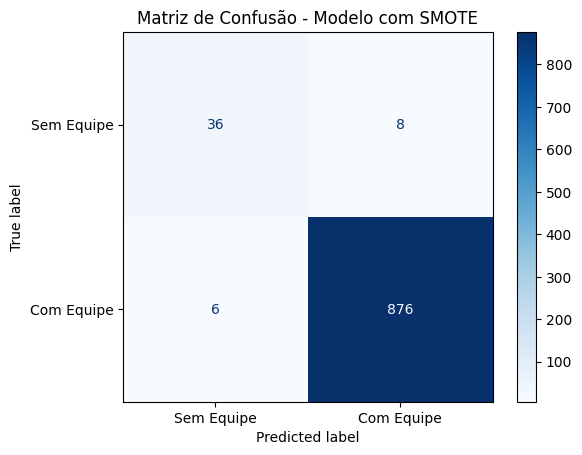

              precision    recall  f1-score   support

  Sem Equipe       0.86      0.82      0.84        44
  Com Equipe       0.99      0.99      0.99       882

    accuracy                           0.98       926
   macro avg       0.92      0.91      0.91       926
weighted avg       0.98      0.98      0.98       926



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# 1) Rebalancear com SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 2) Treinar pipeline no conjunto rebalanceado
pipeline_smote = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

pipeline_smote.fit(X_train_res, y_train_res)

# 3) Prever no conjunto de teste original
y_pred_smote = pipeline_smote.predict(X_test)

# 4) Gerar matriz de confusão
cm_smote = confusion_matrix(y_test, y_pred_smote, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_smote, display_labels=['Sem Equipe', 'Com Equipe'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Modelo com SMOTE")
plt.show()

# 5) Imprimir relatório de classificação
print(classification_report(y_test, y_pred_smote, target_names=['Sem Equipe', 'Com Equipe']))

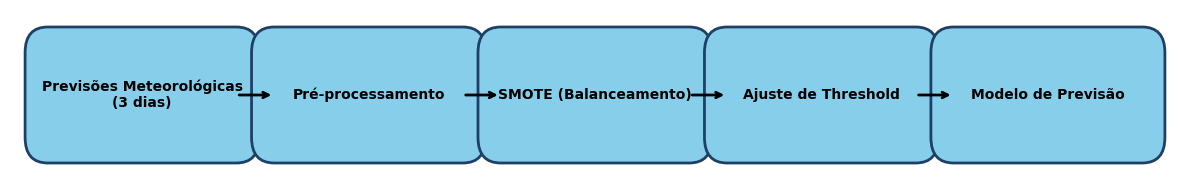

In [ ]:
from matplotlib.patches import FancyBboxPatch

fig, ax = plt.subplots(figsize=(12, 2))

steps = [
    "Previsões Meteorológicas\n(3 dias)",
    "Pré-processamento",
    "SMOTE (Balanceamento)",
    "Ajuste de Threshold",
    "Modelo de Previsão"
]

x_positions = [i*3 for i in range(len(steps))]

for i, (x, step) in enumerate(zip(x_positions, steps)):
    # Caixa do passo
    box = FancyBboxPatch((x, 0), 2.5, 1,
                         boxstyle="round,pad=0.3", fc="#87CEEB", ec="#1E3F66", lw=2)
    ax.add_patch(box)
    ax.text(x + 1.25, 0.5, step, ha="center", va="center", fontsize=10, weight="bold", wrap=True)

    # Setas da borda direita da caixa atual para a borda esquerda da próxima
    if i < len(steps) - 1:
        start_x = x + 2.5  # borda direita da caixa atual
        end_x = x_positions[i+1]  # borda esquerda da próxima caixa
        ax.annotate("",
                    xy=(end_x, 0.5), xytext=(start_x, 0.5),
                    arrowprops=dict(arrowstyle="->", lw=2, color="black"))

ax.set_xlim(-0.5, x_positions[-1] + 3)
ax.set_ylim(-0.5, 1.5)
ax.axis("off")
plt.tight_layout()
plt.savefig("pipeline_diagrama_corrigido.png", dpi=300)
plt.show()


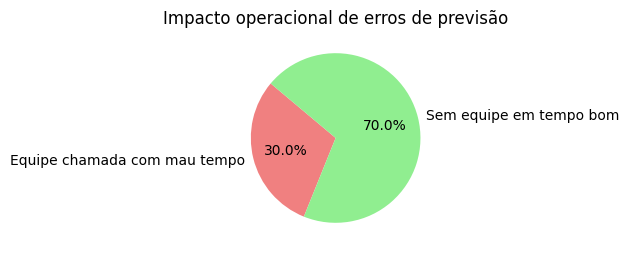

In [ ]:

labels = ['Equipe chamada com mau tempo', 'Sem equipe em tempo bom']
sizes = [30, 70]  # Exemplo fictício: 30% chamadas desnecessárias, 70% falta de equipe
colors = ['lightcoral', 'lightgreen']

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
ax.set_title('Impacto operacional de erros de previsão')
plt.tight_layout()
plt.savefig("impacto_operacional.png", dpi=300)
plt.show()
